#### Context    
> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?    
> If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela    
>     
> Greetings!    
>     
#### Content    
> 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!    
>     
> scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Família    
>     
> 14 variables    
>     
#### Data Dictionary    
> 01 - PatientId    
> Identification of a patient    
> 02 - AppointmentID    
> Identification of each appointment    
> 03 - Gender    
> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.    
> 04 - ScheduledDay    
> The day of the actuall appointment, when they have to visit the doctor.    
> 05 - AppointmentDay   
> The day someone called or registered the appointment, this is before appointment of course.    
> 06 - Age    
> How old is the patient.    
> 07 - Neighbourhood    
> Where the appointment takes place.    
> 08 - Scholarship    
> True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Família    
> 09 - Hipertension    
> True or False    
> 10 - Diabetes    
> True or False    
> Alcoholism    
> True or False    
> Handcap    
> True or False    
> SMS_received    
> 1 or more messages sent to the patient.    
> No-show    
> True or False.    
> Inspiration    
> What if that possible to predict someone to no-show an appointment?    


#### 1- Let us load the necessary packages 

In [1]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio

import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('data/KaggleV2-May-2016.csv',  low_memory=False)

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }


In [2]:
df.sort_values(by=['Age'])


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
102834,4.882675e+10,5659726,F,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,No
102832,9.726846e+12,5749887,F,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
102830,2.845290e+13,5664173,M,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes


### Checking for errors and NaNs


#### 2-We found -1 data in the year row. we delete this

In [3]:
df=df[df['Age']>=0]

#### 3-Null data checked

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

It is clear that we do not have any NaNs anywhere in the data.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### 4-No-show type and Gender is object. Let's convert this to boolean

In [6]:
df =df.replace({'No-show': {'Yes': True, 'No': False}})

In [7]:
df =df.replace({'Gender': {'F': 0, 'M': 1}})

#### AppointmentDay and ScheduledDay type is object. Let's convert this to datetime

In [8]:
df['AppointmentDay']=pd.to_datetime(df["AppointmentDay"])
df['ScheduledDay']=pd.to_datetime(df["ScheduledDay"])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  int64              
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

#### 5-We are looking at categorical variables

In [10]:
df.nunique() 

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
df.describe(include=['O'])

,Neighbourhood
count,110526
unique,81
top,JARDIM CAMBURI
freq,7717


In [12]:
df.describe()


,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

#### 6-Participation Rate

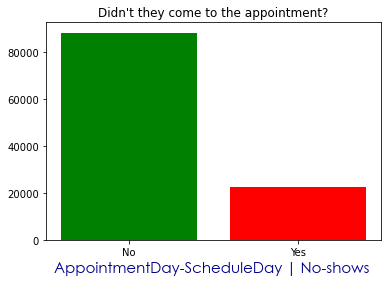

In [16]:
plt.bar(["No","Yes"], df["No-show"].value_counts(),
        color=["green","red"]),
plt.title("Didn't they come to the appointment?")
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)

plt.show()

#df['No-show'][df['No-show']=='Yes'].count()

#### 7-Let's calculate the percentage of women and men attending the appointment

In [17]:
df.groupby("Gender")["Gender"].count()

Gender
0    71839
1    38687
Name: Gender, dtype: int64

#### 8-Chart showing whether men and women attend the hospital appointment

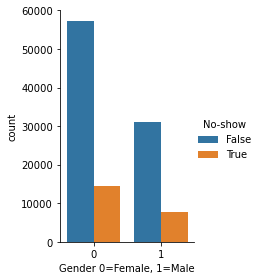

In [18]:
g = sns.catplot(x="Gender", hue="No-show",
                data=df, kind="count",
                height=4, aspect=.7);
g.set(xlabel='Gender 0=Female, 1=Male')
plt.show()

In [26]:
totalf=df.groupby("Gender")["Gender"].count()[0]  ##Total Female
totalm=df.groupby("Gender")["Gender"].count()[1]  ##Total Male
#yesf=df[df['No-show']=='Yes'].groupby("Gender")["Gender"].count()[0]
#yesm=df[df['No-show']=='Yes'].groupby("Gender")["Gender"].count()[1]

#yespercentagef=yesf/totalf
#yespercentagem=yesm/totalm

nof=df[df['No-show']==False].groupby("Gender")["Gender"].count()[0]
nom=df[df['No-show']==False].groupby("Gender")["Gender"].count()[1]
nopercentagef=nof/(totalf)*100
nopercentagem=nom/(totalm)*100


#### 9-Percentage of man and women attending the appointment

In [27]:
print("Percentage of female attending the appointment")
print(nopercentagef)

print("Percentage of male attending the appointment")
print(nopercentagem)


Percentage of female attending the appointment
79.68512924734476
Percentage of male attending the appointment
80.03205211052808


> There is not much difference in the rate of men and women attending appointments

In [28]:
(df.AppointmentDay)-(df.ScheduledDay)

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

#### 10-No-show appointments   (AppointmentDay-ScheduleDay)

In [29]:
df["days"]=(df["AppointmentDay"]-df["ScheduledDay"]).dt.days



In [33]:
noshowy=df[df['No-show']==True]["days"]

noshown=df[df['No-show']==False]["days"]


#### 11-How many days ago they got the appointment

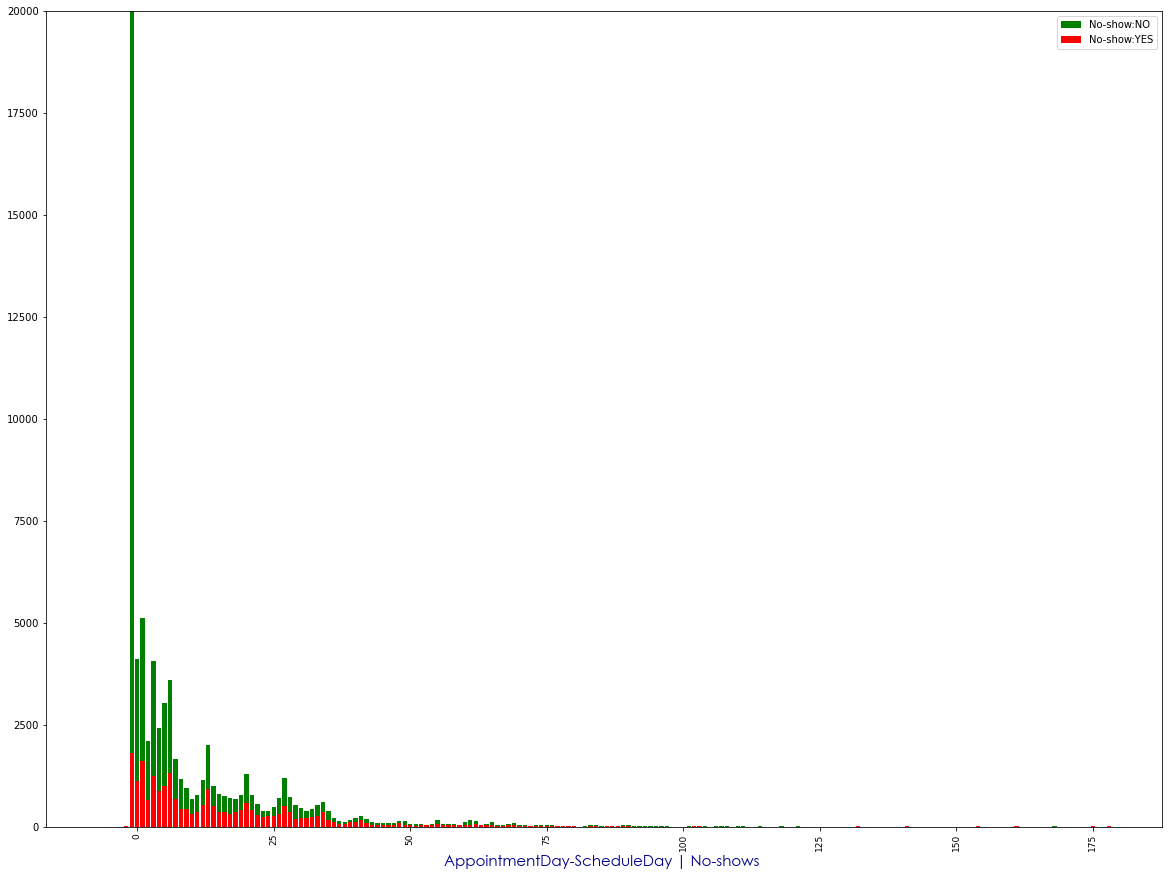

In [34]:
plt.figure(figsize=(20, 15))

plt.subplot(1,1,1)
plt.bar(noshown.value_counts().index,noshown.value_counts(), color = "GREEN",label = 'No-show:NO')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-show:NO ',fontdict = axis_style)

plt.subplot(1,1,1)
plt.bar(noshowy.value_counts().index,noshowy.value_counts(), color = "RED",label = 'No-show:YES')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)
plt.ylim(0,20000)
plt.legend()
plt.show()

> Same Day Appointments are more likely to attend

In [161]:
plt.figure(figsize=(20, 20))
dayrate=noshowy.value_counts()/(noshown.value_counts()+noshowy.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=dayrate.index, 
             y=dayrate.values,title="Percentage of customers not attending the daily appointment",
                 labels={"index": "How many days ago",  
                         "y": "rate of not attending to appointment"})

fig.show()



<Figure size 1440x1440 with 0 Axes>

In [283]:
def daycategories(day):
    if day==0: return "sameday"
    elif day<10: return "firstcategory"
    else: return "other"

In [284]:
df["days"]=(df["AppointmentDay"]-df["ScheduledDay"]).dt.days

In [285]:
df.days.apply(daycategories)

0         firstcategory
1         firstcategory
2         firstcategory
3         firstcategory
4         firstcategory
              ...      
110522            other
110523            other
110524            other
110525            other
110526            other
Name: days, Length: 110526, dtype: object

In [286]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

#### 12-The proportion of those who have more than one appointment on the same date

In [36]:
#patientdf=df.groupby(["PatientId","AppointmentDay"])["AppointmentDay"].count().reset_index()
#patientdf2=patientdf[patientdf>1]
patientdf=df.groupby(["PatientId","AppointmentDay"]).AppointmentID.count().reset_index()

merge=pd.merge(df, patientdf, left_on= ['PatientId','AppointmentDay'], right_on= ['PatientId','AppointmentDay'],how="inner")

In [37]:
merge ##aynı gün kaç randevu aldı

,PatientId,AppointmentID_x,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days,AppointmentID_y
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,-1,2
1,2.987250e+13,5639907,0,2016-04-29 09:47:47+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,-1,2
2,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False,-1,2
3,5.589978e+14,5642211,1,2016-04-29 15:20:47+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False,-1,2
4,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,False,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,False,34,1
110522,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,False,34,1
110523,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,False,40,1
110524,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,False,40,1


In [40]:
patientdf[patientdf["AppointmentID"]>1]

,PatientId,AppointmentDay,AppointmentID
31,1.781682e+08,2016-05-02 00:00:00+00:00,2
49,2.699191e+08,2016-05-20 00:00:00+00:00,2
79,5.225847e+08,2016-05-16 00:00:00+00:00,2
84,5.551995e+08,2016-05-30 00:00:00+00:00,2
108,7.241189e+08,2016-05-10 00:00:00+00:00,4
...,...,...,...
101763,9.988821e+14,2016-05-03 00:00:00+00:00,2
101771,9.992778e+14,2016-05-05 00:00:00+00:00,2
101775,9.993364e+14,2016-05-05 00:00:00+00:00,2
101784,9.996275e+14,2016-05-16 00:00:00+00:00,2


In [79]:
merge2=merge.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

In [80]:
merge2=merge2.rename(columns={"AppointmentID_y": "DailyAppointment"})
#merge2["DailyAppointmentRate"]=(merge2["AppointmentDay"]-df["ScheduledDay"]).dt.days

In [81]:
merge2.groupby(["DailyAppointment","No-show"]).AppointmentID_x.count().reset_index()


,DailyAppointment,No-show,AppointmentID_x
0,1,False,75580
1,1,True,18746
2,2,False,5038
3,2,True,1494
4,3,False,590
5,3,True,149
6,4,False,131
7,4,True,26
8,5,False,27
9,5,True,6


In [82]:
merge2

,PatientId,AppointmentID_x,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days,DailyAppointment
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,-1,2
2,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False,-1,2
4,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,False,-1,2
6,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False,-1,1
7,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,False,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,False,34,1
110522,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,False,34,1
110523,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,False,40,1
110524,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,False,40,1


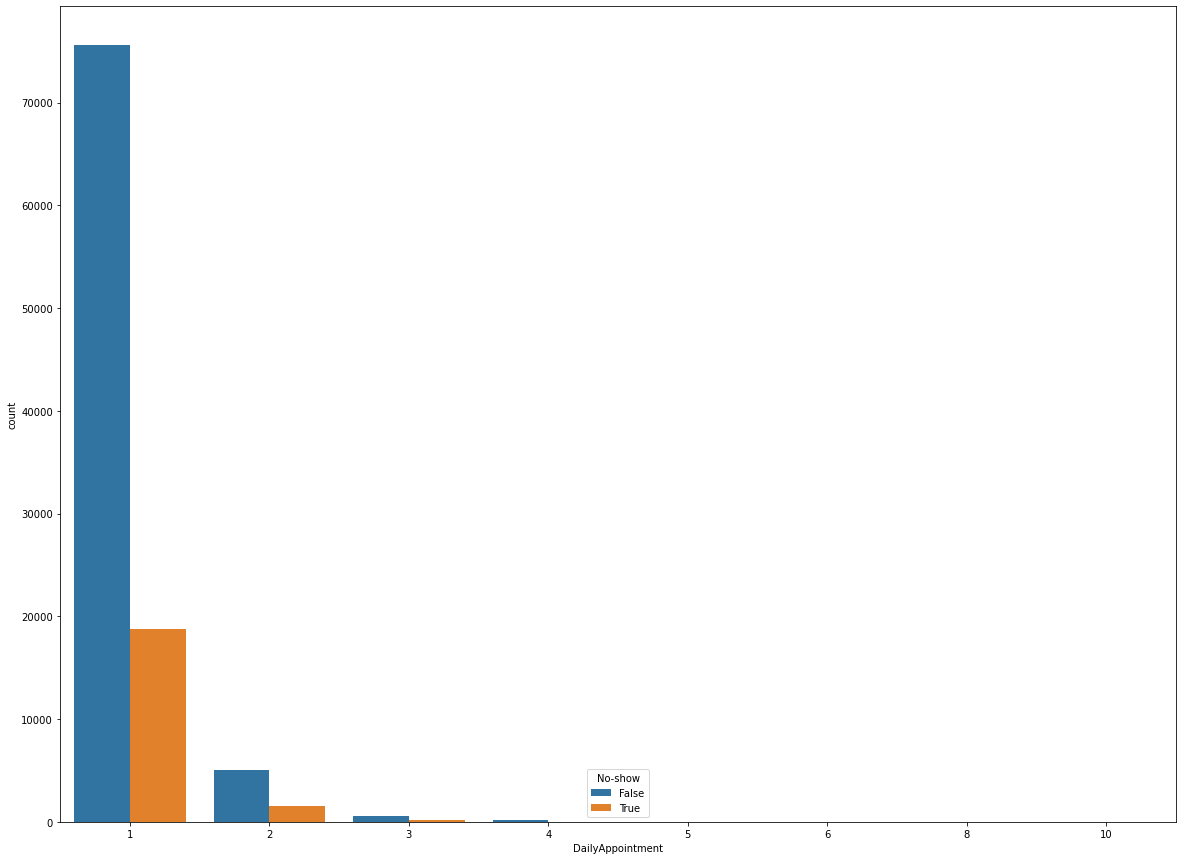

In [160]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(x="DailyAppointment", hue="No-show", data=merge2)
plt.show()

In [86]:
noshowyes=merge2[merge2['No-show']==True]["DailyAppointment"]
noshowno=merge2[merge2['No-show']==False]["DailyAppointment"]

In [90]:


plt.figure(figsize=(20, 15))
dayapprate=noshowyes.value_counts()/(noshowno.value_counts()+noshowyes.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayapprate, 
             x=dayapprate.index, 
             y=dayapprate.values,title="The non-participation rate of customers who made an appointment on the same date",
                 labels={"index": "How many appointments were made on the same date?",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

#### Scholarship recipients rate of attending the appointment

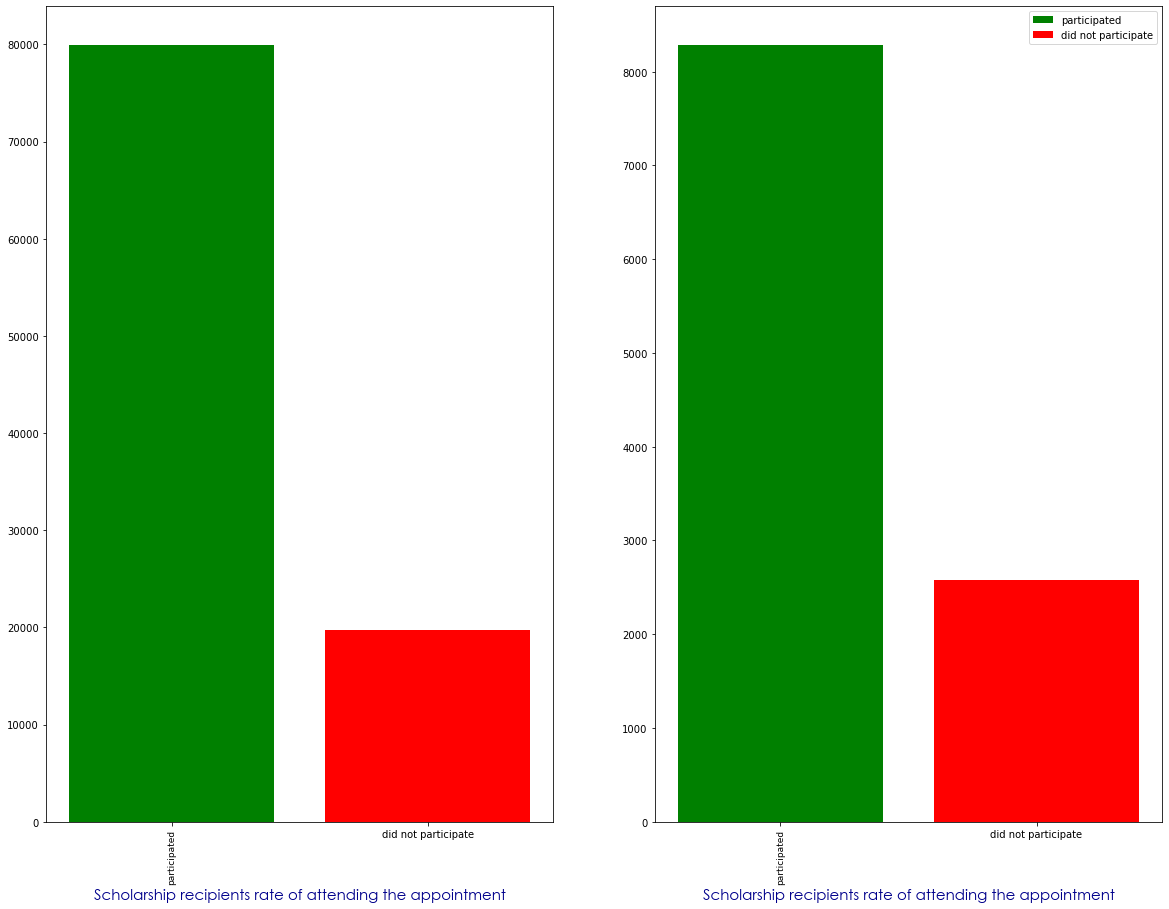

In [94]:
plt.figure(figsize=(20, 15))

plt.subplot(1,2,1)
plt.bar("participated",df[(df["Scholarship"]==0) & (df["No-show"]==False)]['No-show'].count(), color = "GREEN",label = 'participated')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)
plt.bar("did not participate",df[(df["Scholarship"]==0) & (df["No-show"]==True)]['No-show'].count(), color = "RED",label = 'did not participate')

plt.subplot(1,2,2)
plt.bar("participated",df[(df["Scholarship"]==1) & (df["No-show"]==False)]['No-show'].count(), color = "GREEN",label = 'participated')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)

plt.bar("did not participate",df[(df["Scholarship"]==1) & (df["No-show"]==True)]['No-show'].count(), color = "RED",label = 'did not participate')

plt.legend()
plt.show()

Scholarship=0 rate

In [102]:
scolarshipn=df[(df["Scholarship"]==1) & (df["No-show"]==False)]['No-show'].count()
scolarshipy=df[(df["Scholarship"]==1) & (df["No-show"]==True)]['No-show'].count()

In [103]:
scolarshipy/(scolarshipn+scolarshipy)*100

23.73630420771568

>Scholarship recipients rate of attending the appointment

In [104]:
scolarshipn=df[(df["Scholarship"]==0) & (df["No-show"]==False)]['No-show'].count()
scolarshipy=df[(df["Scholarship"]==0) & (df["No-show"]==True)]['No-show'].count()


In [105]:
scolarshipy/(scolarshipn+scolarshipy)*100

19.807354638037424

>The rate of those who do not receive a scholarship to attend the appointment

#### Appointment days and participation rates

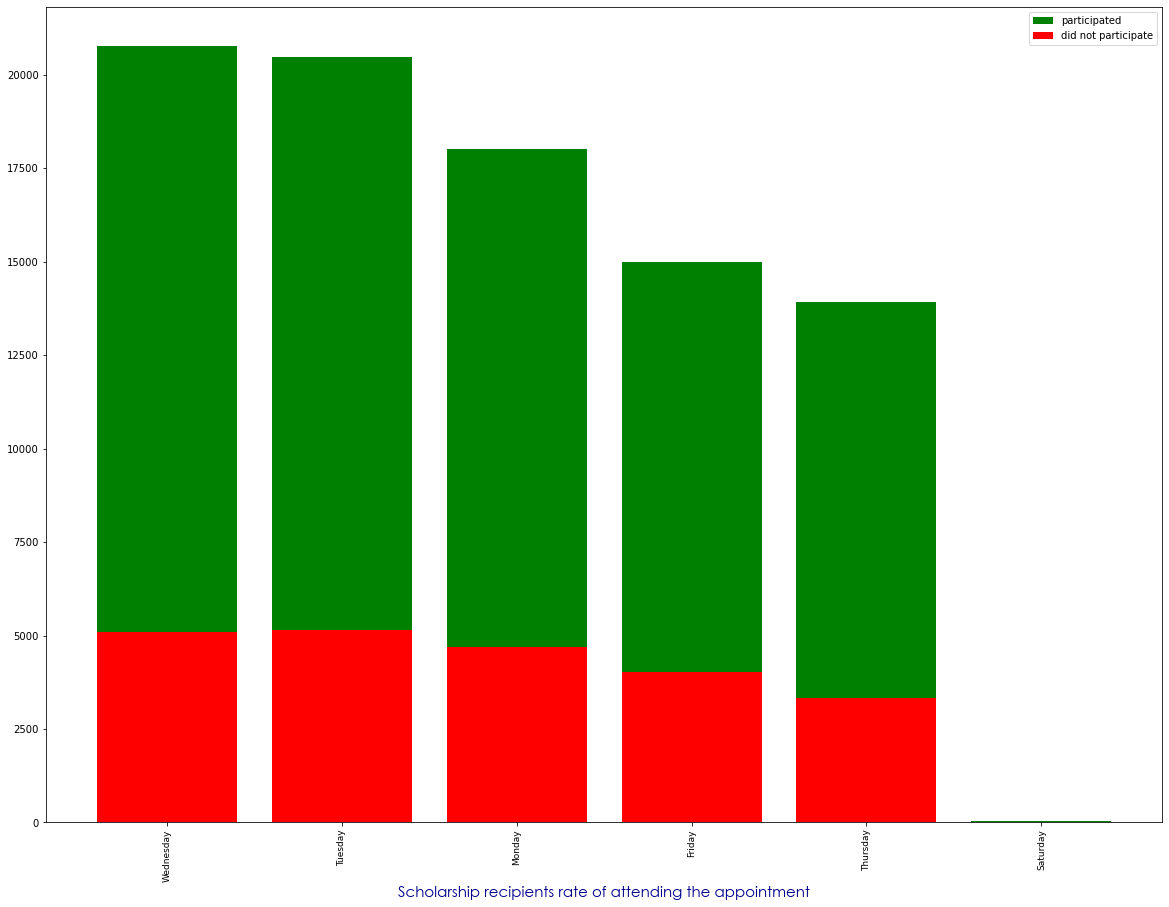

In [118]:
appdaysn=df[df["No-show"]==False].AppointmentDay.dt.day_name().value_counts()
appdaysy=df[df["No-show"]==True].AppointmentDay.dt.day_name().value_counts()
plt.figure(figsize=(20, 15))
plt.subplot(1,1,1)
plt.bar(appdaysn.index,appdaysn.values, color = "GREEN",label = 'participated')
plt.bar(appdaysy.index,appdaysy.values, color = "RED",label = 'did not participate')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)
plt.legend()
plt.show()

In [114]:
df[df["No-show"]==False].AppointmentDay.dt.day_name().value_counts()


Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: AppointmentDay, dtype: int64

In [135]:

plt.figure(figsize=(20, 15))
samedayrate=appdaysy/(appdaysn+appdaysy)*100
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=samedayrate.index, 
             y=samedayrate.values,title="Daily attendance chart",
                 labels={"index": "What day was an appointment",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

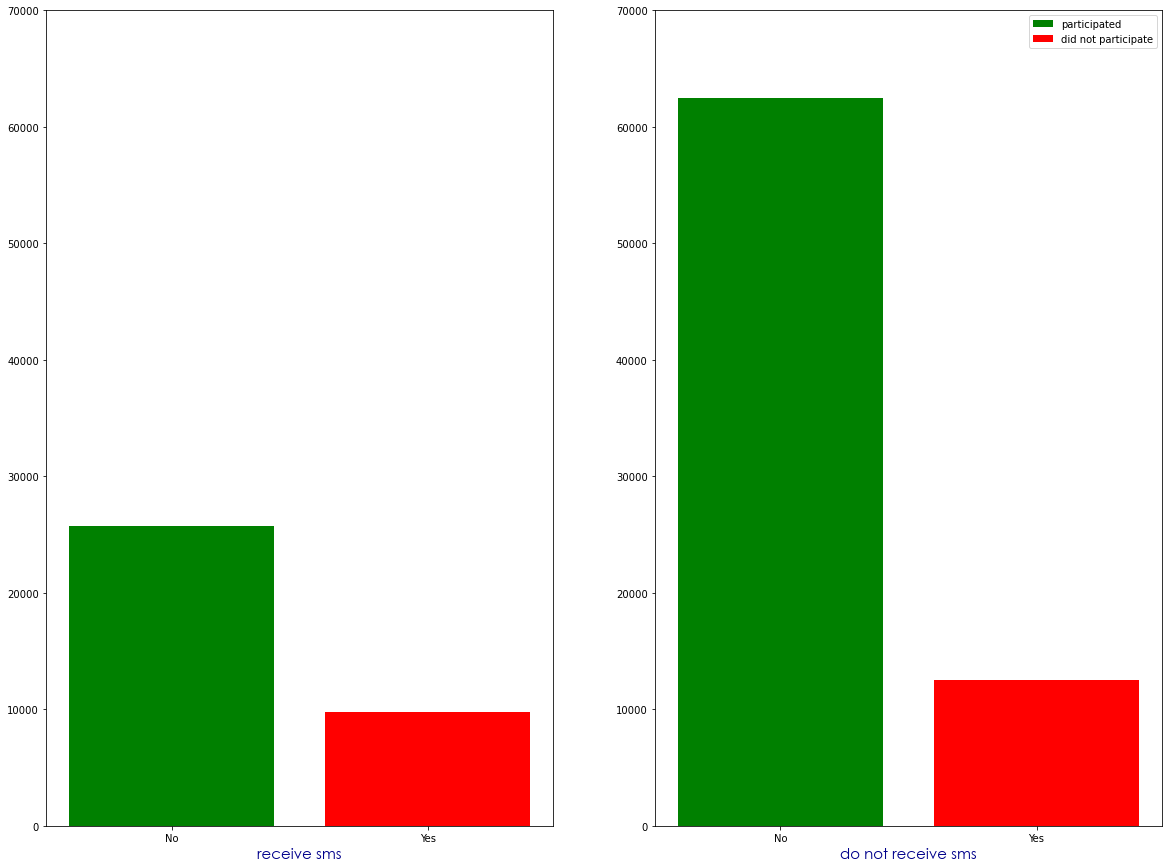

In [136]:
plt.figure(figsize=(20, 15))
plt.subplot(1,2,1)
plt.bar("No",df[(df["No-show"]==False) & (df['SMS_received']>0)]["No-show"].count(), color = "GREEN",label = 'participated')
plt.bar("Yes",df[(df["No-show"]==True) & (df['SMS_received']>0)]["No-show"].count(), color = "RED",label = 'did not participate')
plt.xlabel("receive sms",fontdict = axis_style)
plt.ylim(0,70000)
plt.subplot(1,2,2)
plt.bar("No",df[(df["No-show"]==False) & (df['SMS_received']==0)]["No-show"].count(), color = "GREEN",label = 'participated')
plt.bar("Yes",df[(df["No-show"]==True) & (df['SMS_received']==0)]["No-show"].count(), color = "RED",label = 'did not participate')
plt.xlabel("do not receive sms",fontdict = axis_style)
plt.legend()
plt.ylim(0,70000)
plt.show()

> Percentage of customers attending an appointment with sms

In [137]:
df[(df["No-show"]==False) & (df['SMS_received']>0)]["No-show"].count()/df[(df["No-show"]==True) & (df['SMS_received']>0)]["No-show"].count()

2.62653311529027

> Percentage of customers coming to the appointment without SMS

In [138]:
df[(df["No-show"]==False) & (df['SMS_received']==0)]["No-show"].count() / df[(df["No-show"]==True) & (df['SMS_received']==0)]["No-show"].count()

4.986757080175509

In [139]:
dfsms=df[df['SMS_received']>0]

In [140]:
((dfsms.AppointmentDay)-(dfsms.ScheduledDay)).sort_values()

45522      2 days 08:01:12
51902      2 days 08:01:24
45508      2 days 08:01:25
90157      2 days 08:01:30
45493      2 days 08:01:39
                ...       
102791   178 days 13:16:10
102799   178 days 13:16:43
102796   178 days 13:16:59
102797   178 days 13:17:18
102795   178 days 13:19:01
Length: 35482, dtype: timedelta64[ns]

#### the rate of those with and without chronic illnesses coming to the appointment

In [146]:
chronicpatientdf=df[(df["Hipertension"]==1) | (df["Diabetes"]==1) | (df["Alcoholism"]==1) | (df["Handcap"]==1)]
notchronic=df[(df["Hipertension"]==0) & (df["Diabetes"]==0) & (df["Alcoholism"]==0) & (df["Handcap"]==0)]

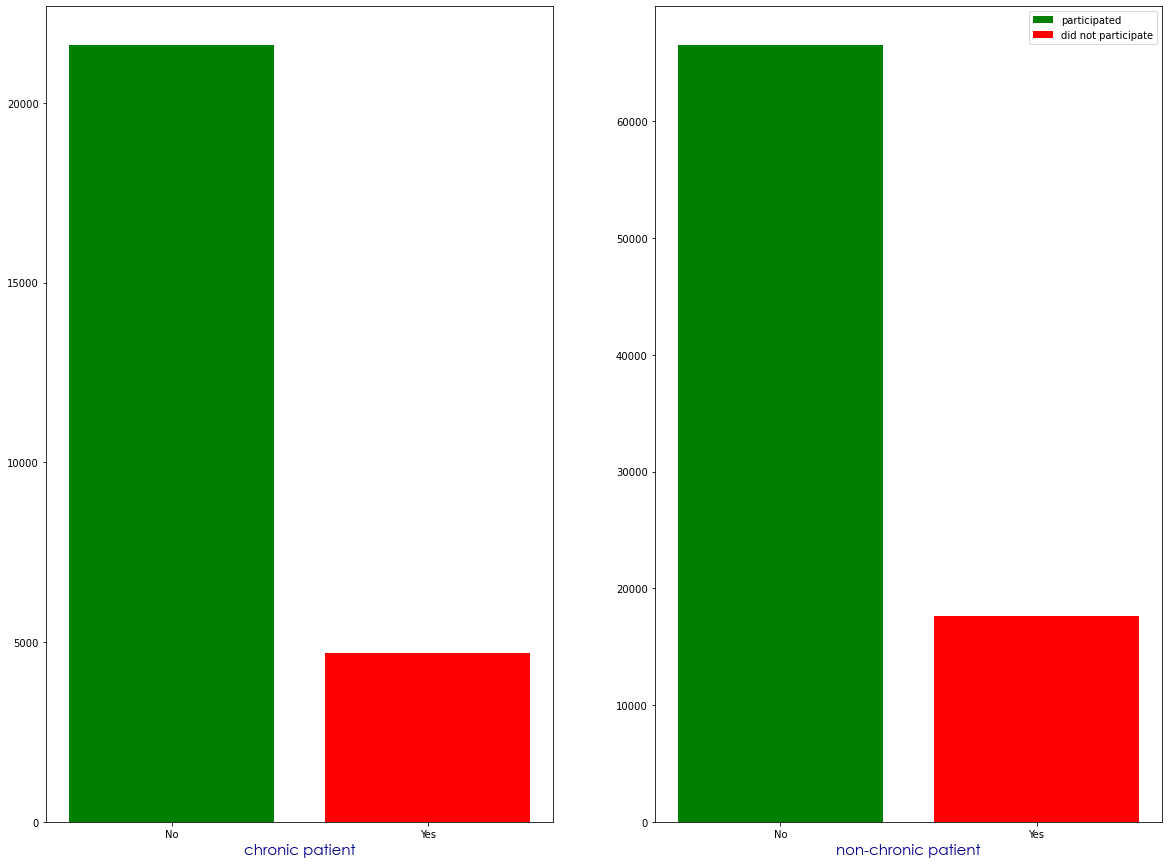

In [142]:
plt.figure(figsize=(20, 15))
plt.subplot(1,2,1)
plt.bar("No",chronicpatientdf[chronicpatientdf["No-show"]==False]["No-show"].count(), color = "GREEN",label = 'participated')
plt.bar("Yes",chronicpatientdf[chronicpatientdf["No-show"]==True]["No-show"].count(), color = "RED",label = 'did not participate')
plt.xlabel("chronic patient",fontdict = axis_style)
plt.subplot(1,2,2)
plt.bar("No",notchronic[notchronic["No-show"]==False]["No-show"].count(), color = "GREEN",label = 'participated')
plt.bar("Yes",notchronic[notchronic["No-show"]==True]["No-show"].count(), color = "RED",label = 'did not participate')
plt.xlabel("non-chronic patient",fontdict = axis_style)

plt.legend()
plt.show()

> Chronic patient participation rate

In [143]:
chronicn=chronicpatientdf[chronicpatientdf["No-show"]==False]["No-show"].count()

chronicy=chronicpatientdf[chronicpatientdf["No-show"]==True]["No-show"].count()

In [144]:
chronicn/(chronicn+chronicy)*100

82.13131581948826

> Non-chronic patient participation rate

In [147]:
notchronicn=notchronic[notchronic["No-show"]==False]["No-show"].count()
notchronicy=notchronic[notchronic["No-show"]==True]["No-show"].count()

In [148]:
notchronicn/(notchronicn+notchronicy)*100

79.0724492950044

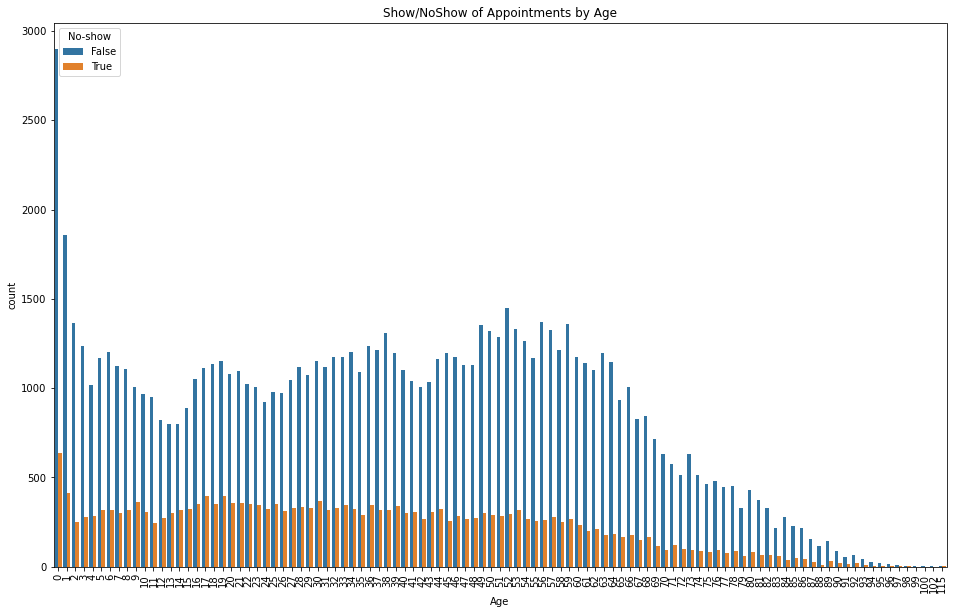

In [145]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df["No-show"])
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

In [168]:
agen=df[df["No-show"]==False].Age
agey=df[df["No-show"]==True].Age


In [173]:

plt.figure(figsize=(20, 15))
agerate=agey.value_counts()/(agey.value_counts()+agen.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayapprate, 
             x=agerate.index, 
             y=agerate.values,title="The non-participation rate of customers who made an appointment on the same date",
                 labels={"index": "How many appointments were made on the same date?",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

In [152]:
noshowcorr = df.corr()
display(noshowcorr)

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
PatientId,1.000000,0.004023,0.007898,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456,-0.001459
AppointmentID,0.004023,1.000000,0.018506,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597,-0.771830
Gender,0.007898,0.018506,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.004122,-0.028411
Age,-0.004121,-0.019106,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.034811
Scholarship,-0.002877,0.022619,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.030423
Hipertension,-0.006436,0.012759,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,-0.017218
Diabetes,0.001608,0.022632,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.027190
Alcoholism,0.011014,0.032946,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.038520
Handcap,-0.007915,0.014107,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.019844
SMS_received,-0.009742,-0.256613,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.398143


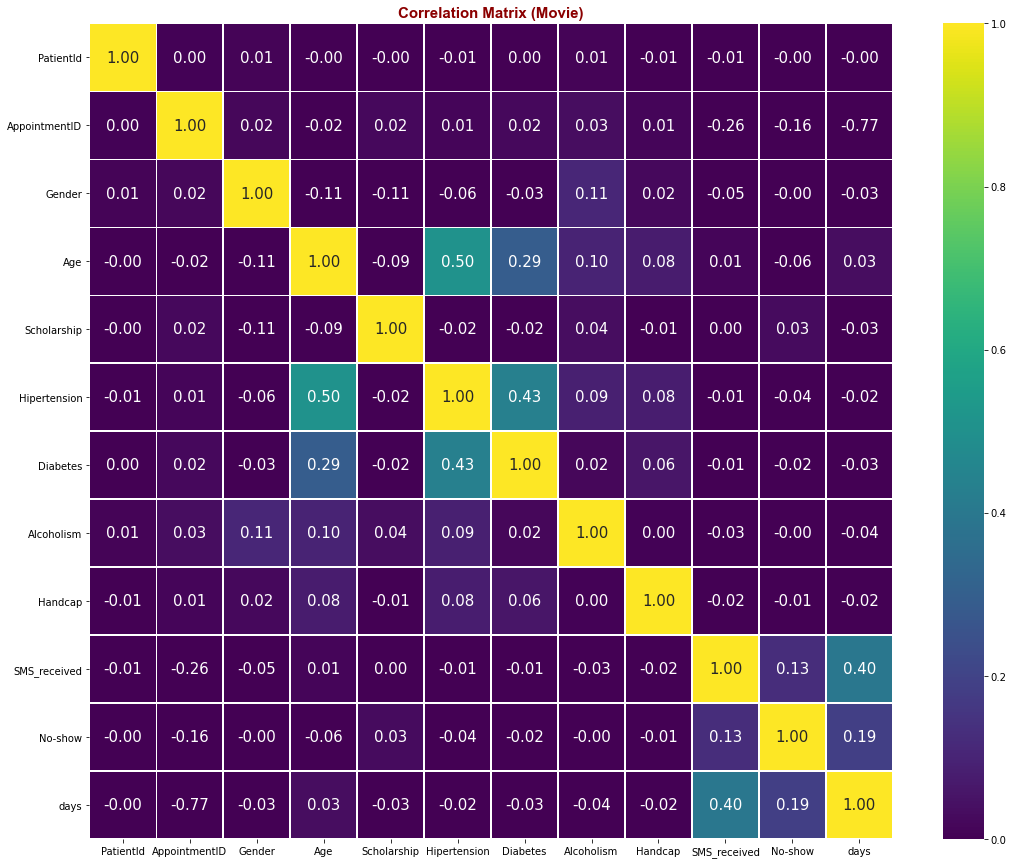

In [158]:
plt.figure(figsize=(18,15))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 15 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }
sns.heatmap(noshowcorr, annot=True, fmt='.2f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)", fontdict=title_font)

plt.show()

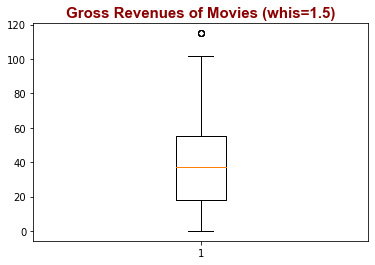

In [159]:
plt.boxplot(df.Age.dropna())
plt.title("Gross Revenues of Movies (whis=1.5)", fontdict=title_font)
plt.show()